# GROUP 7
# IMAGE AUGMENTATION USING ROTATION 

# LOADING DATASETS FROM FILE DIRECTORY

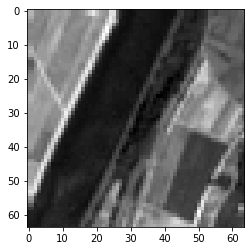

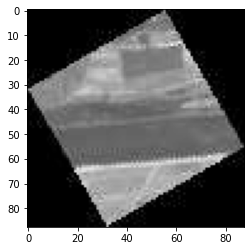

In [5]:
import numpy as np 
import matplotlib.pyplot as plt 
import os 
import cv2 
DATADIR= 'C:\\Users\\HP\\Desktop\\Datasets\\rivers'
CATEGORIES = ["original", "rotated"]
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break 
        break 

# PRINTING THE IMAGE ARRAY 

In [6]:
print (img_array.shape)

(88, 88)


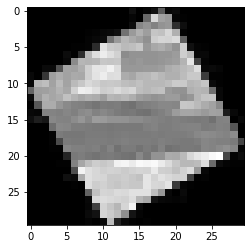

In [7]:
IMG_SIZE =30 
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array,cmap='gray')
plt.show()

# CLASS FOR TRAINING DATASET

In [8]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num =CATEGORIES.index(category)
        for img in os.listdir(path):            
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e: 
                 pass
create_training_data()
    

# RANDOM SHUFFLING OF OUR DATASET(ORIGINAL , ROTATED)

In [9]:
import random 
random.shuffle(training_data)

In [10]:
for sample in training_data[:10]:
    print (sample[1])

0
0
0
1
1
1
1
1
1
0


# DEFINING X,ROTATED AND Y, ORIGINAL IMAGES

In [14]:
X=[]
y=[]


# EXCTRACTING THE FEATURES OF ORIGINAL IMAGES AND LABELLING THEM 

In [15]:
for features, label in training_data:
    X.append(features)
    y.append(label)
X = np.array(X). reshape(-1, IMG_SIZE, IMG_SIZE, 1)

# CONVERTING THE DATASETS INTO BYTES TO STORE IN A FILE
# WB= FILE IS OPENED FOR WRITING IN BINARY MODE

In [16]:
import pickle 

pickle_out= open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out= open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [17]:
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

In [45]:
X[1]

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  8],
        [  0],
        [  3],
        [  9],
        [ 46],
        [  4],
        [  6],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  3],
        [  0],
        [ 52],
        [106],
        [ 80],
        [ 76],
        [  3],
        [  1],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
      

# CNN MODEL

In [23]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D 
from tensorflow.keras.callbacks import TensorBoard
#dense layer perform vector matrix multiplication 
#flatten it convert 3d inputs into 1d
#dropout it help to train the model better
#activation increases non linearity in the output 
#conv2d creates a convolutional kernel that is is convolved with layer input to produce a tensors of output 
#tensorboard helps in saving the model
#optimizer calculate weight updates

import pickle 
import numpy as np 
import time

pickle_in = open("X.pickle", "rb")
X= pickle.load(pickle_in)

pickle_in = open("y.pickle", "rb")
y= pickle.load(pickle_in)

X = X/255.0

dense_layers = [0]
layer_sizes = [64]
conv_layers = [3]

for dense_layer in dense_layers:
    for layer_size in layer_sizes: 
        for conv_layer in conv_layers:
            NAME= "{}-conv-{}-nodes-{}-dense-{}".format(conv_layer, layer_size, dense_layer, int(time.time()))
            print (NAME)
            model = Sequential()
            tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))


            model.add(Conv2D(layer_size,(3,3), input_shape = X.shape[1:] ))

            model.add(Activation("relu"))

            model.add(MaxPooling2D(pool_size=(2,2)))


            for l in range(conv_layer-1):

                model.add(Conv2D(layer_size,(3,3) ))

                model.add(Activation("relu"))

                model.add(MaxPooling2D(pool_size=(2,2)))


            model.add(Flatten())

            for _ in range(dense_layer):

                model.add(Dense(layer_size))
                model.add(Activation('relu')) 
                model.add(Dense(1))
                model.add(Activation('sigmoid'))
                
                
model.compile(loss='binary_crossentropy', optimizer='adam', metrics= ['accuracy'],)
X = np.asarray(X)
y = np.asarray(y)
model.save('64 x 3- CNN.model')

model.fit(X, y, batch_size=32, epochs=3, validation_split =0.1, callbacks=[tensorboard] )




3-conv-64-nodes-0-dense-1645875598
Epoch 1/3
90/90 [==============================] - 15s 84ms/step - loss: 2.7694 - accuracy: 0.0600 - val_loss: 2.4428 - val_accuracy: 0.0094
Epoch 2/3
90/90 [==============================] - 6s 66ms/step - loss: 1.7500 - accuracy: 0.0021 - val_loss: 1.2731 - val_accuracy: 0.0000e+00
Epoch 3/3
90/90 [==============================] - 6s 68ms/step - loss: 1.3451 - accuracy: 0.0000e+00 - val_loss: 1.2502 - val_accuracy: 0.0000e+00
